# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
file_path = 'train.csv'  
df = pd.read_csv(file_path, index_col=0)
df.head()

,id,stmt_date,HQ_city,legal_struct,ateco_sector,def_date,fs_year,asst_intang_fixed,asst_tang_fixed,asst_fixed_fin,...,inc_extraord,taxes,profit,days_rec,ebitda,roa,roe,wc_net,margin_fin,cf_operations
17,520288,2011-12-31,28.0,SRL,14.0,NaT,2011,67537.0,1137566.0,1908.0,...,-309.0,-80959.0,-81288.0,NaN,6318.0,-3.81,-28.03,496258.0,-917029.0,-849.0
18,520288,2008-12-31,28.0,SRL,14.0,NaT,2008,256438.0,1181416.0,860.0,...,-678.0,-94622.0,-107382.0,NaN,46088.0,-2.76,NaN,97952.0,NaN,-3881.0
19,520288,2009-12-31,28.0,SRL,14.0,NaT,2009,194046.0,1152014.0,860.0,...,4224.0,-74235.0,-77819.0,NaN,67611.0,-2.17,NaN,-210671.0,NaN,32618.0
21,520288,2012-12-31,28.0,SRL,14.0,NaT,2012,15195.0,1116938.0,2023.0,...,3634.0,-250786.0,-250786.0,NaN,-161478.0,-12.99,NaN,367892.0,-1094962.0,-168907.0
22,520288,2007-12-31,28.0,SRL,14.0,NaT,2007,126603.0,1127807.0,620.0,...,820.0,92192.0,36733.0,NaN,153060.0,6.20,52.43,-317007.0,-1184970.0,80039.0


In [6]:
df.shape

(1023552, 43)

In [11]:
df['stmt_date'].min(),df['stmt_date'].max()

('2007-12-31', '2012-12-31')

In [13]:
# 

### OUTLIER REMOVAL: COMMENT OUT LATER

In [14]:
# #Remove Outlier to get better look with scatter plots
# max_value = df['asst_tot'].max()
# df = df[df['asst_tot'] != max_value]

# print(df['asst_tot'].max())

## Default within a Year (Definition may be adjusted later)

In [15]:
df['stmt_date'] = pd.to_datetime(df['stmt_date'])
df['def_date'] = pd.to_datetime(df['def_date'])

# Calculate 1 year after stmt_date
one_year_after = df['stmt_date'] + pd.DateOffset(years=1)

# Define default if def_date is between stmt_date and one_year_after
df['default'] = ((df['def_date'] >= df['stmt_date']) & (df['def_date'] <= one_year_after)).astype(int)

In [16]:
df['default'].mean()

np.float64(0.0112783717876571)

In [17]:
df[df['default'] == 1]

,id,stmt_date,HQ_city,legal_struct,ateco_sector,def_date,fs_year,asst_intang_fixed,asst_tang_fixed,asst_fixed_fin,...,taxes,profit,days_rec,ebitda,roa,roe,wc_net,margin_fin,cf_operations,default
4437727,40230625,2007-12-31,63.0,SRU,47.0,2008-10-31,2007,962.0,109805.0,1000.0,...,-132942.0,-118449.0,52.92,-52281.0,-0.88,-131.96,207900.0,-22007.0,-108670.0,1
4437728,40750382,2007-12-31,38.0,SRU,45.0,2008-07-28,2007,10063.0,3922517.0,12955.0,...,-773649.0,-811105.0,77.31,32139.0,-1.96,NaN,-2199583.0,NaN,-617507.0,1
4437731,66210931,2007-12-31,93.0,SRL,68.0,2008-12-22,2007,21052.0,898791.0,0.0,...,-153019.0,-167949.0,NaN,-31374.0,-3.12,NaN,-594066.0,-908808.0,-135332.0,1
4437732,75040931,2007-12-31,93.0,SPA,31.0,2008-11-19,2007,302565.0,1225564.0,537308.0,...,-1434984.0,-1435842.0,NaN,-718172.0,-14.12,NaN,2540474.0,-1891390.0,-1136205.0,1
4437735,85280527,2007-12-31,52.0,SRL,10.0,2008-05-15,2007,698.0,2497682.0,0.0,...,-200778.0,-200778.0,NaN,-147948.0,-7.35,-8.08,9893.0,-12174.0,-159578.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823555,92000200193,2012-12-31,19.0,SRL,41.0,2013-11-15,2012,0.0,565753.0,1227.0,...,-92149.0,-97709.0,NaN,-172276.0,-4.54,-11.81,584486.0,260330.0,-82393.0,1
4823559,92068990644,2012-12-31,63.0,SRL,68.0,2013-05-02,2012,11141.0,6765962.0,0.0,...,103330.0,59670.0,-431.80,113470.0,1.58,0.87,86393.0,84381.0,63383.0,1
4823565,93004420142,2012-12-31,14.0,SPA,37.0,2013-12-19,2012,276865.0,3616109.0,2800.0,...,6264.0,1654.0,-62.08,200453.0,0.72,0.39,-133980.0,-3475857.0,166140.0,1
4823585,95086570249,2012-12-31,24.0,SRL,70.0,2013-12-18,2012,0.0,0.0,659430.0,...,120983.0,86288.0,NaN,-22522.0,-0.55,1.91,4088506.0,3849373.0,90255.0,1


In [18]:
df.columns

Index(['id', 'stmt_date', 'HQ_city', 'legal_struct', 'ateco_sector',
       'def_date', 'fs_year', 'asst_intang_fixed', 'asst_tang_fixed',
       'asst_fixed_fin', 'asst_current', 'AR', 'cash_and_equiv', 'asst_tot',
       'eqty_tot', 'eqty_corp_family_tot', 'liab_lt', 'liab_lt_emp',
       'debt_bank_st', 'debt_bank_lt', 'debt_fin_st', 'debt_fin_lt', 'AP_st',
       'AP_lt', 'debt_st', 'debt_lt', 'rev_operating', 'COGS',
       'prof_operations', 'goodwill', 'inc_financing', 'exp_financing',
       'prof_financing', 'inc_extraord', 'taxes', 'profit', 'days_rec',
       'ebitda', 'roa', 'roe', 'wc_net', 'margin_fin', 'cf_operations',
       'default'],
      dtype='object')

In [19]:
# Check for missing values
missing_values = df.isnull().sum()
print('missing vals:')
print(missing_values[missing_values > 0])

missing vals:
HQ_city                     277
def_date                 968128
asst_intang_fixed           162
asst_tang_fixed             103
asst_fixed_fin              237
asst_current                  1
AR                           12
cash_and_equiv               17
eqty_tot                      1
eqty_corp_family_tot    1023552
liab_lt                     294
liab_lt_emp                 162
debt_bank_st             121331
debt_bank_lt              90971
debt_fin_st              122772
debt_fin_lt               92068
AP_st                    120635
AP_lt                     92244
debt_st                       5
debt_lt                     155
rev_operating               174
COGS                         24
prof_operations              21
goodwill                     21
inc_financing                26
exp_financing               367
prof_financing              656
inc_extraord                305
taxes                        32
profit                       20
days_rec                 7

# Features of Risk Calc
- Assets (Total): Measures the size of the firm, adjusted for inflation.
- Inventory / Cost of Goods Sold (COGS): Assesses inventory efficiency.
- Liabilities / Assets: A measure of financial leverage.
- Net Income / Assets: Profitability ratio indicating asset efficiency.
- Net Income Growth: Tracks changes in profitability over time.
- Quick Ratio: A liquidity ratio for assessing short-term solvency.
- Retained Earnings / Assets: Indicates long-term financial stability.
- Sales Growth: Measures the growth trajectory of a firm's revenue.
- Cash / Assets: Assesses liquidity and the firm’s ability to meet short-term obligations.
- Debt Service Coverage Ratio: Evaluates the firm's ability to cover debt payments from its earnings.


## 1. Assets Total QA

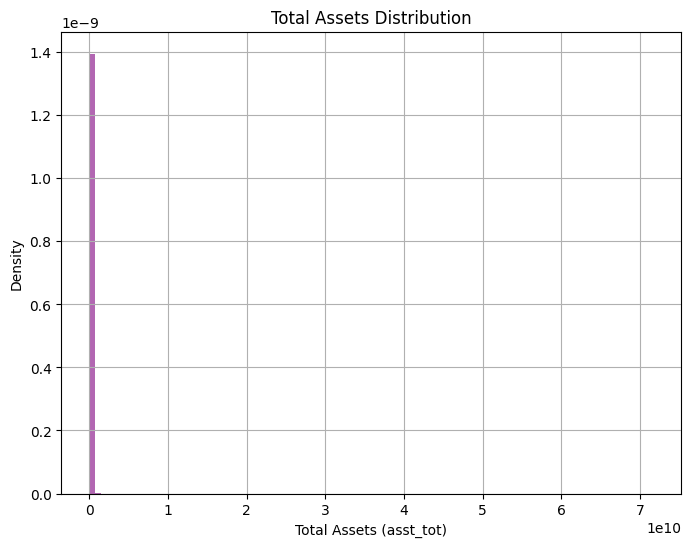

In [20]:
# Create a histogram with 50 bins to display the distribution of total assets
plt.figure(figsize=(8, 6))
plt.hist(df['asst_tot'], bins=100, density=True, color='purple', alpha=0.6)
plt.title('Total Assets Distribution')
plt.xlabel('Total Assets (asst_tot)')
plt.ylabel('Density')
plt.grid(True)

# Display the plot
plt.show()

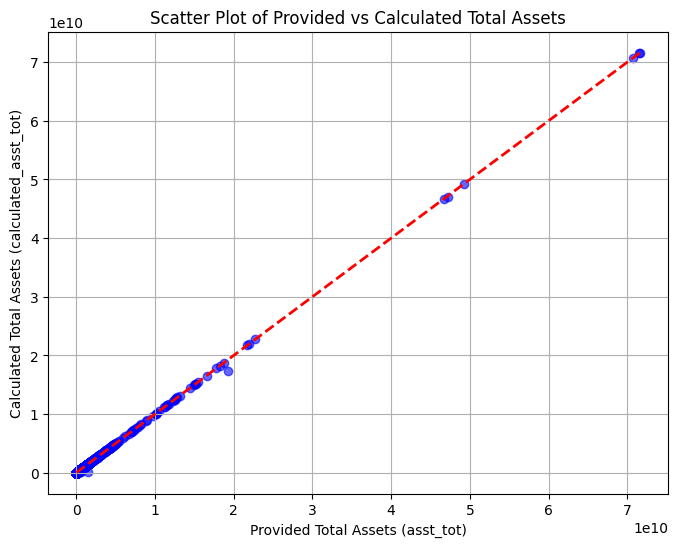

average_percent_difference between asst_intang_fixed + asst_tang_fixed + asst_fixed_fin + asst_current and total assets: 1.299050089047286


In [21]:
calculated_assets_total = (
    df['asst_intang_fixed'] + 
    df['asst_tang_fixed'] + 
    df['asst_fixed_fin'] + 
    df['asst_current']
)

# Compare calculated total assets with the provided total assets
df['calculated_asst_tot'] = calculated_assets_total

# Create a scatter plot comparing calculated total assets to provided total assets
plt.figure(figsize=(8, 6))
plt.scatter(df['asst_tot'], df['calculated_asst_tot'], color='blue', alpha=0.6)
plt.plot([df['asst_tot'].min(), df['asst_tot'].max()], [df['asst_tot'].min(), df['asst_tot'].max()], color='red', lw=2, linestyle='--')  # Line of equality
plt.title('Scatter Plot of Provided vs Calculated Total Assets')
plt.xlabel('Provided Total Assets (asst_tot)')
plt.ylabel('Calculated Total Assets (calculated_asst_tot)')
plt.grid(True)

# Display the plot
plt.show()

# Calculate percent difference
percent_difference = (df['calculated_asst_tot'] - df['asst_tot']).abs() / df['asst_tot'] * 100
# Calculate the average percent difference
average_percent_difference = percent_difference.mean()
print('average_percent_difference between asst_intang_fixed + asst_tang_fixed + asst_fixed_fin + asst_current and total assets:', average_percent_difference)

#### It appears that total assets is roughly df['asst_intang_fixed'] + df['asst_tang_fixed'] + df['asst_fixed_fin'] + df['asst_current'], although there is a 1.4% difference.

### Is data reliable? Let's check Assets = Liabilities + Equity

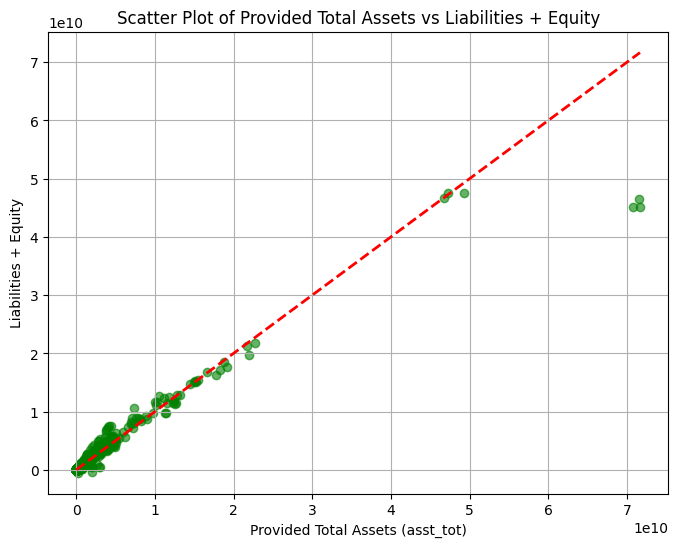

avg pct diff: 16.7001427751732


In [22]:
df['liab_tot'] = df['debt_st'] + df['debt_lt'] + df['AP_st'] + df['AP_lt']
df['calculated_liabilities_equity'] = df['liab_tot'] + df['eqty_tot']

# Create a scatter plot comparing total assets to liabilities + equity
plt.figure(figsize=(8, 6))
plt.scatter(df['asst_tot'], df['calculated_liabilities_equity'], color='green', alpha=0.6)
plt.plot([df['asst_tot'].min(), df['asst_tot'].max()], [df['asst_tot'].min(), df['asst_tot'].max()], color='red', lw=2, linestyle='--')  # Line of equality
plt.title('Scatter Plot of Provided Total Assets vs Liabilities + Equity')
plt.xlabel('Provided Total Assets (asst_tot)')
plt.ylabel('Liabilities + Equity')
plt.grid(True)

# Display the plot
plt.show()

# Calculate percent difference
percent_difference_liabilities_equity = (df['calculated_liabilities_equity'] - df['asst_tot']).abs() / df['asst_tot'] * 100

# Calculate the average percent difference
average_percent_difference_liabilities_equity = percent_difference_liabilities_equity.mean()
print('avg pct diff:', average_percent_difference_liabilities_equity)


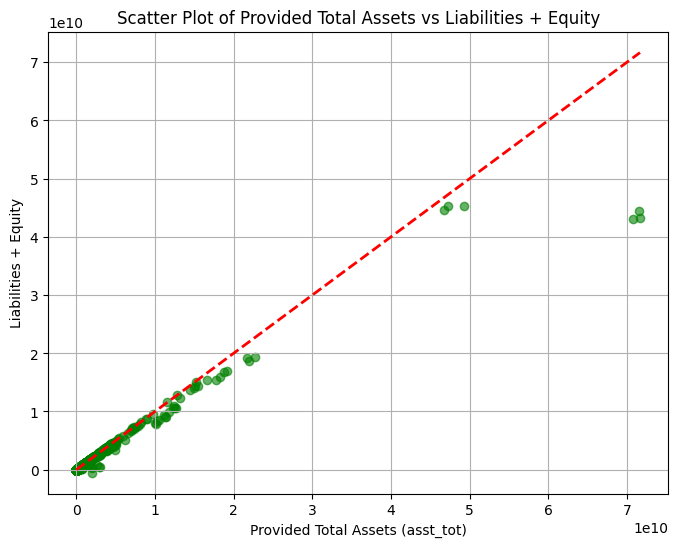

avg pct diff: 5.095842477577012


In [23]:
df['liab_tot'] = df['debt_st'] + df['debt_lt'] 
df['calculated_liabilities_equity'] = df['liab_tot'] + df['eqty_tot']

# Create a scatter plot comparing total assets to liabilities + equity
plt.figure(figsize=(8, 6))
plt.scatter(df['asst_tot'], df['calculated_liabilities_equity'], color='green', alpha=0.6)
plt.plot([df['asst_tot'].min(), df['asst_tot'].max()], [df['asst_tot'].min(), df['asst_tot'].max()], color='red', lw=2, linestyle='--')  # Line of equality
plt.title('Scatter Plot of Provided Total Assets vs Liabilities + Equity')
plt.xlabel('Provided Total Assets (asst_tot)')
plt.ylabel('Liabilities + Equity')
plt.grid(True)

# Display the plot
plt.show()

# Calculate percent difference
percent_difference_liabilities_equity = (df['calculated_liabilities_equity'] - df['asst_tot']).abs() / df['asst_tot'] * 100

# Calculate the average percent difference
average_percent_difference_liabilities_equity = percent_difference_liabilities_equity.mean()
print('avg pct diff:', average_percent_difference_liabilities_equity)


#### It seems here that liab_tot is better approximated by just total debt.... This doesn't make sense to me.
----
I think perhaps the issue is due to issues with accounts payables having nulls. The thing is I don't think we can recover AP_st or AP_lt because we do not have a total AP number. **Only idea is that AP total could be extracted from some other field??** As of RN I do not know if possible...

## Conditional Probability of Default for Total Assets

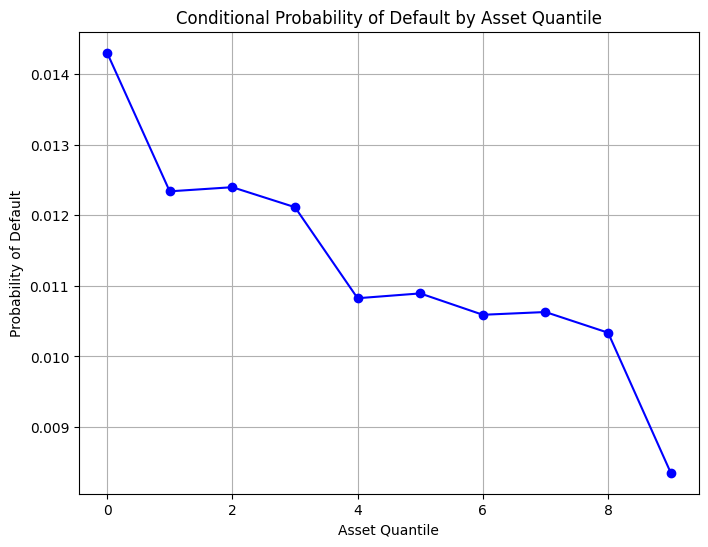

In [24]:
quantiles = 10
df['asset_quantile'] = pd.qcut(df['asst_tot'], q=quantiles, labels=False)  # 4 quantiles (quartiles)

# Step 3: Calculate the conditional probability of default for each quantile
quantile_default_rate = df.groupby('asset_quantile')['default'].mean()
quantile_default_rate

plt.figure(figsize=(8, 6))

# Plot the line chart for default probability by asset quantile
plt.plot(quantile_default_rate.index, quantile_default_rate.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Conditional Probability of Default by Asset Quantile')
plt.xlabel('Asset Quantile')
plt.ylabel('Probability of Default')
plt.grid(True)

# Show the plot
plt.show()

# 2. Inventory / Cost of Goods Sold (COGS):  (inventory efficiency)
----
We do not have access to Inventory, nor a good way to extract it from the fields we have... We will have to skip this

# 3. Liabilities / Assets: (financial leverage)
-----
For this to work, we have to be somewhat sure that our total Liabilities field we calculated makes sense. The above check that total assets = total liabilities + equity shows that it is at least close. **It is possible we are missing something in calculating our total liabilities though and if we are then this could be impacted.** 

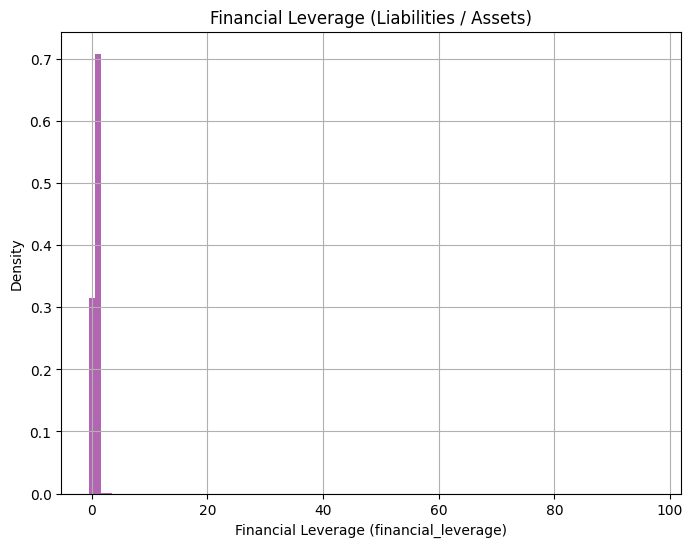

In [25]:
df['financial_leverage'] = df['liab_tot'] / df['asst_tot']

# Create a histogram with 50 bins to display the distribution of total assets
plt.figure(figsize=(8, 6))
plt.hist(df['financial_leverage'], bins=100, density=True, color='purple', alpha=0.6)
plt.title('Financial Leverage (Liabilities / Assets)')
plt.xlabel('Financial Leverage (financial_leverage)')
plt.ylabel('Density')
plt.grid(True)

# Display the plot
plt.show()

## Conditional Probability of Default for Financial Leverage

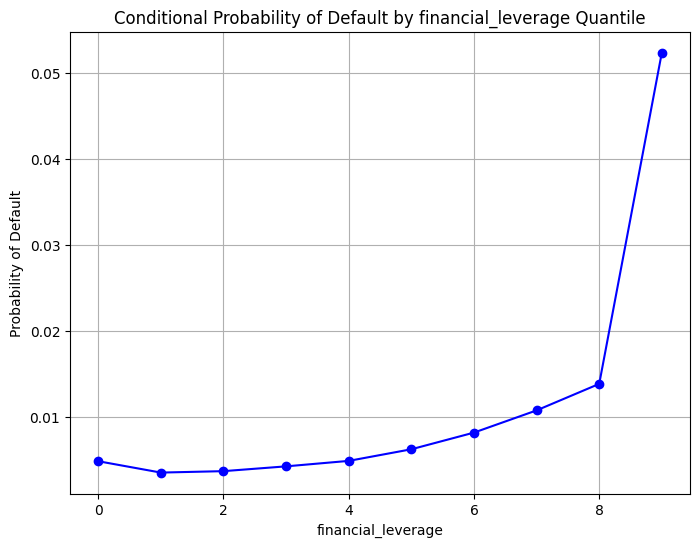

In [26]:
quantiles = 10
df['financial_leverage_quantile'] = pd.qcut(df['financial_leverage'], q=quantiles, labels=False)  # 4 quantiles (quartiles)

# Step 3: Calculate the conditional probability of default for each quantile
quantile_default_rate = df.groupby('financial_leverage_quantile')['default'].mean()
quantile_default_rate

plt.figure(figsize=(8, 6))

# Plot the line chart for default probability by financial_leverage
plt.plot(quantile_default_rate.index, quantile_default_rate.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Conditional Probability of Default by financial_leverage Quantile')
plt.xlabel('financial_leverage')
plt.ylabel('Probability of Default')
plt.grid(True)

# Show the plot
plt.show()

# 4. Net Income / Assets: (Profitability ratio)
---
Here, profit is same as net income I believe... We have no nulls in profit or in total assets, so we should be ok. Total assets appears to check out. **Still need to do QC on profit (does it check out with revenue - costs?)**

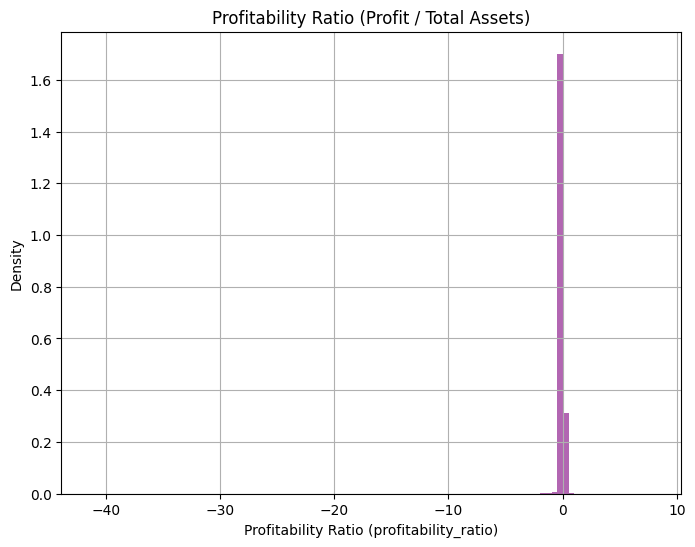

In [28]:
df['profitability_ratio'] = df['profit'] / df['asst_tot']

# Create a histogram with 50 bins to display the distribution of total assets
plt.figure(figsize=(8, 6))
plt.hist(df['profitability_ratio'], bins=100, density=True, color='purple', alpha=0.6)
plt.title('Profitability Ratio (Profit / Total Assets)')
plt.xlabel('Profitability Ratio (profitability_ratio)')
plt.ylabel('Density')
plt.grid(True)

# Display the plot
plt.show()

## Conditional Probability of Default for Profitability ratio

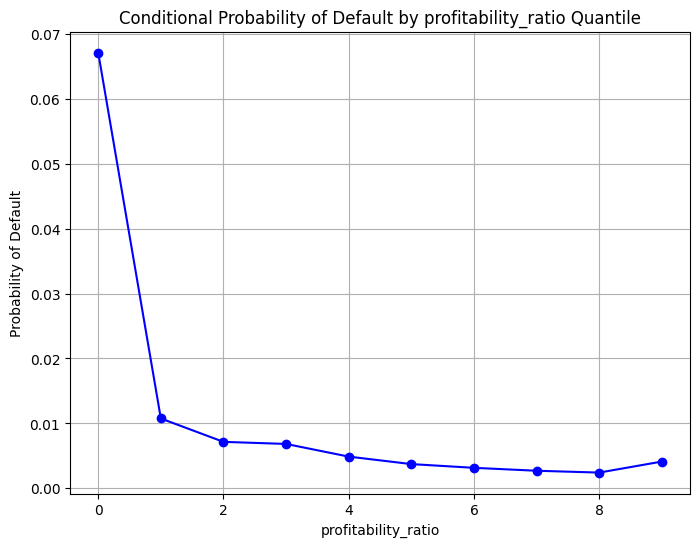

In [29]:
quantiles = 10
df['profitability_ratio_quantile'] = pd.qcut(df['profitability_ratio'], q=quantiles, labels=False)  # 4 quantiles (quartiles)

# Step 3: Calculate the conditional probability of default for each quantile
quantile_default_rate = df.groupby('profitability_ratio_quantile')['default'].mean()
quantile_default_rate

plt.figure(figsize=(8, 6))

# Plot the line chart for default probability by profitability_ratio
plt.plot(quantile_default_rate.index, quantile_default_rate.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Conditional Probability of Default by profitability_ratio Quantile')
plt.xlabel('profitability_ratio')
plt.ylabel('Probability of Default')
plt.grid(True)

# Show the plot
plt.show()

# 5. Net Income Growth
----
As discussed in our meeting, there are some significant challenges to using this. I am going to leave this for later...

# 6. Quick Ratio: (LiquidAssets:Current Liabilities)
---
There are a few cheat sheet formulas to consider:
1. (current assets - inventory) / current liabilities
- This cant work as we don't have inventory
2. (Cash + marketable securities + net receivabl) / current liabilities
- this maybe can work, we have AR and AP_st and AP_lt so can do net receivables 
3. (cash + cash equivalents + short term investments + current recievables) / current liabilities
- we dont exactly have short term recievables but can use AR instead...

-----
**CALC of short term liabilities is an open question here**
If we just use debt st that would seem to line up with earlier interpretation of total liabilities. But doesn't quite make logical sense.... Regardless this is how I will proceed for now.

----
We have 2 versions below using what we have from 2. and 3. above. V1 seems more ideal to me, but it will have issues with NAs

In [30]:
#v1: (Cash + marketable securities + net receivabl) / current liabilities
# we can find net receivables
# THIS WILL HAVE ISSUES WITH NULLS FROM AP_st and AP_lt
df['net_receivables'] = df['AR'] - (df['AP_st'] + df['AP_lt'])
df['quick_ratio_v1'] = (df['cash_and_equiv'] + df['net_receivables']) / df['debt_st']

#v2: (cash + cash equivalents + short term investments + current recievables) / current liabilities
# we cant find current recievables so must use all recievables
df['quick_ratio_v2'] = (df['cash_and_equiv'] + df['AR']) / df['debt_st']

### SEE MISSING VALS IN V1

In [31]:
# Check for missing values
missing_values = df.isnull().sum()
print('missing vals:')
print(missing_values[missing_values > 0])

missing vals:
HQ_city                              277
def_date                          968128
asst_intang_fixed                    162
asst_tang_fixed                      103
asst_fixed_fin                       237
asst_current                           1
AR                                    12
cash_and_equiv                        17
eqty_tot                               1
eqty_corp_family_tot             1023552
liab_lt                              294
liab_lt_emp                          162
debt_bank_st                      121331
debt_bank_lt                       90971
debt_fin_st                       122772
debt_fin_lt                        92068
AP_st                             120635
AP_lt                              92244
debt_st                                5
debt_lt                              155
rev_operating                        174
COGS                                  24
prof_operations                       21
goodwill                              21
in

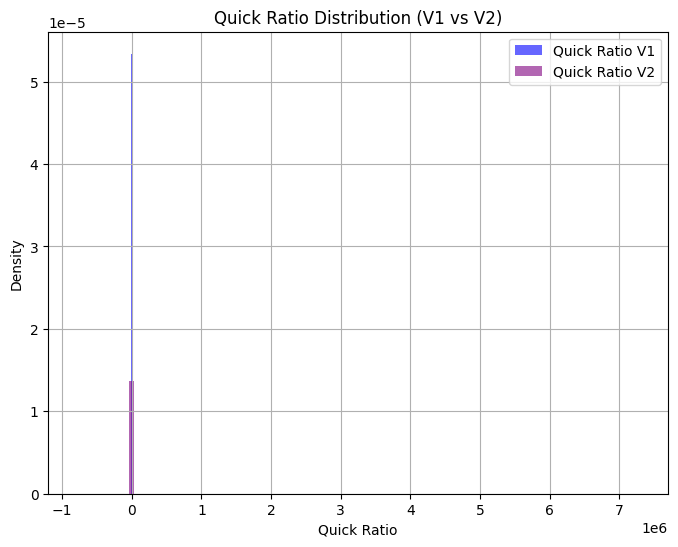

In [32]:
# Now, filter out non-finite values (inf, NaN) from quick_ratio_v1 and quick_ratio_v2
filtered_df = df[np.isfinite(df['quick_ratio_v1']) & np.isfinite(df['quick_ratio_v2'])]

# Create a histogram comparing quick_ratio_v1 and quick_ratio_v2
plt.figure(figsize=(8, 6))

# Plot for quick_ratio_v1
plt.hist(filtered_df['quick_ratio_v1'], bins=100, density=True, alpha=0.6, label='Quick Ratio V1', color='blue')

# Plot for quick_ratio_v2
plt.hist(filtered_df['quick_ratio_v2'], bins=100, density=True, alpha=0.6, label='Quick Ratio V2', color='purple')

# Add title and labels
plt.title('Quick Ratio Distribution (V1 vs V2)')
plt.xlabel('Quick Ratio')
plt.ylabel('Density')

# Add grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

## Conditional Probability of Default for quick_ratio_v2

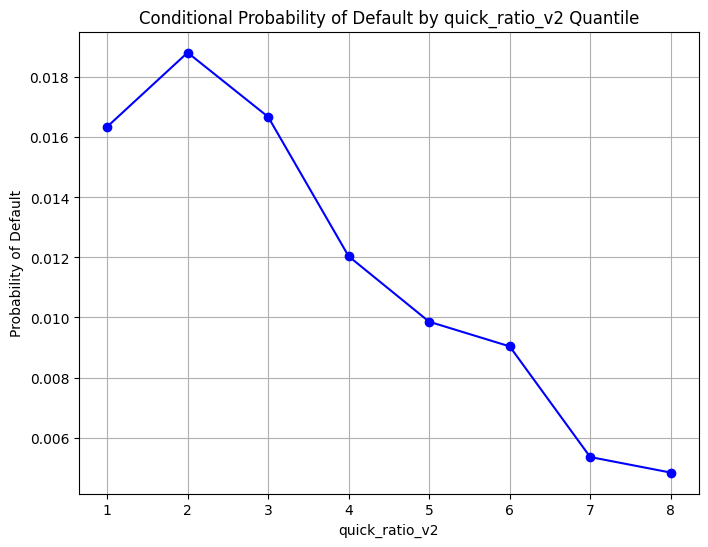

In [36]:
quantiles = 10
df['quick_ratio_v2_quantile'] = pd.qcut(df['quick_ratio_v2'], q=quantiles, labels=False, duplicates='drop')  # 4 quantiles (quartiles)

# Step 3: Calculate the conditional probability of default for each quantile
quantile_default_rate = df.groupby('quick_ratio_v2_quantile')['default'].mean()
quantile_default_rate

plt.figure(figsize=(8, 6))

# Plot the line chart for default probability by quick_ratio_v2
plt.plot(quantile_default_rate.index, quantile_default_rate.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Conditional Probability of Default by quick_ratio_v2 Quantile')
plt.xlabel('quick_ratio_v2')
plt.ylabel('Probability of Default')
plt.grid(True)

# Show the plot
plt.show()

# 7. Retained Earnings / Assets: Indicates long-term financial stability.
----
We don't have an exact proxy for retained earnings (basically we don't know what portion of profit is retained versus not):

**DEF:**
Retained earnings are the cumulative net earnings or profits of a company after accounting for dividend payments. As an important concept in accounting, the word “retained” captures the fact that because those earnings were not paid out to shareholders as dividends, they were instead retained by the company.


# 8.  Sales Growth: Measures the growth trajectory of a firm's revenue.
------

Again, I am going to leave this for now given the dificulties discussed in our meeting with Prof

# 9. Cash / Assets: 

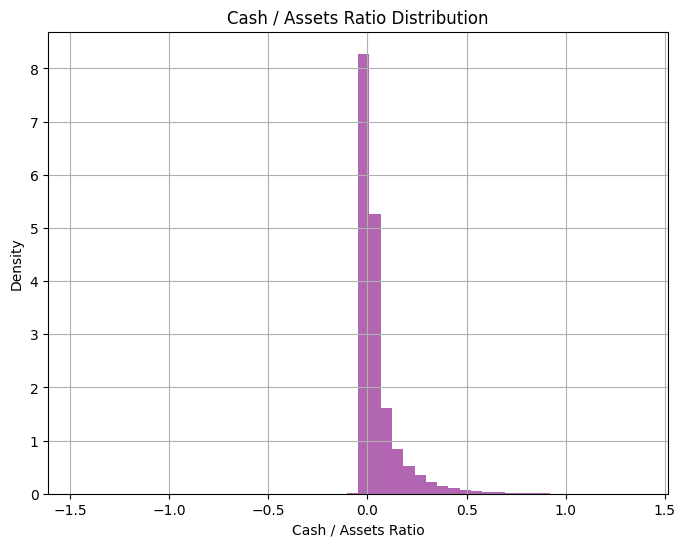

In [37]:
df['cash_assets_ratio'] = df['cash_and_equiv'] / df['asst_tot']

# Create a histogram with 50 bins to display the distribution of Cash / Assets ratio
plt.figure(figsize=(8, 6))
plt.hist(df['cash_assets_ratio'], bins=50, density=True, color='purple', alpha=0.6)
plt.title('Cash / Assets Ratio Distribution')
plt.xlabel('Cash / Assets Ratio')
plt.ylabel('Density')
plt.grid(True)

# Display the plot
plt.show()

## Conditional Probability of Default for cash_assets_ratio

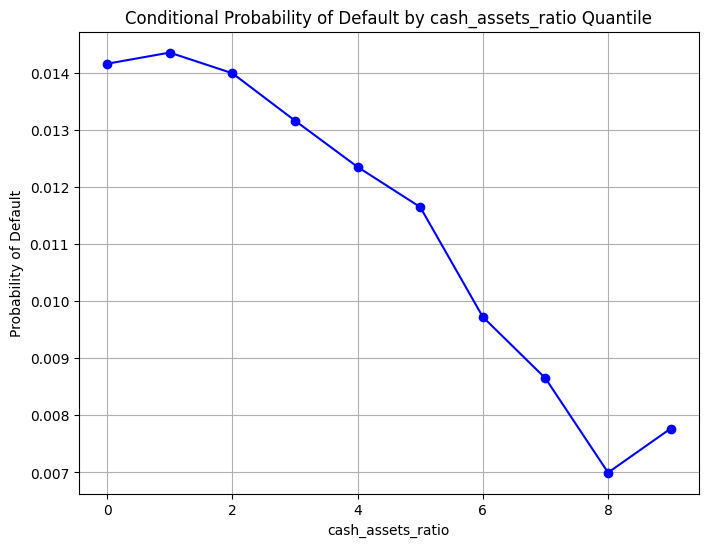

In [38]:
cash_assets_ratioquantiles = 10
df['cash_assets_ratio_quantile'] = pd.qcut(df['cash_assets_ratio'], q=quantiles, labels=False)  # 4 quantiles (quartiles)

# Step 3: Calculate the conditional probability of default for each quantile
quantile_default_rate = df.groupby('cash_assets_ratio_quantile')['default'].mean()
quantile_default_rate

plt.figure(figsize=(8, 6))

# Plot the line chart for default probability by cash_assets_ratio
plt.plot(quantile_default_rate.index, quantile_default_rate.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Conditional Probability of Default by cash_assets_ratio Quantile')
plt.xlabel('cash_assets_ratio')
plt.ylabel('Probability of Default')
plt.grid(True)

# Show the plot
plt.show()

# 10. Debt Service Coverage Ratio: Evaluates the firm's ability to cover debt payments from its earnings.
---
**DEF**:
EBIT/interest

----
WE have ebitda rathter than ebit, and we have exp_financing which captures expensese of financing such as interest...

---
**ISSUE**: exp_financing can be 0, in which case this ratio will not be defined...

For now I think we can set 0 to 1, but this **must be revisisted....**

In [39]:
 df[['ebitda','exp_financing']]

,ebitda,exp_financing
17,6318.0,15550.0
18,46088.0,49758.0
19,67611.0,35239.0
21,-161478.0,14057.0
22,153060.0,13569.0
...,...,...
4885791,984567.0,78684.0
4885792,1746442.0,211575.0
4885793,1539957.0,142949.0
4885815,-4795.0,0.0


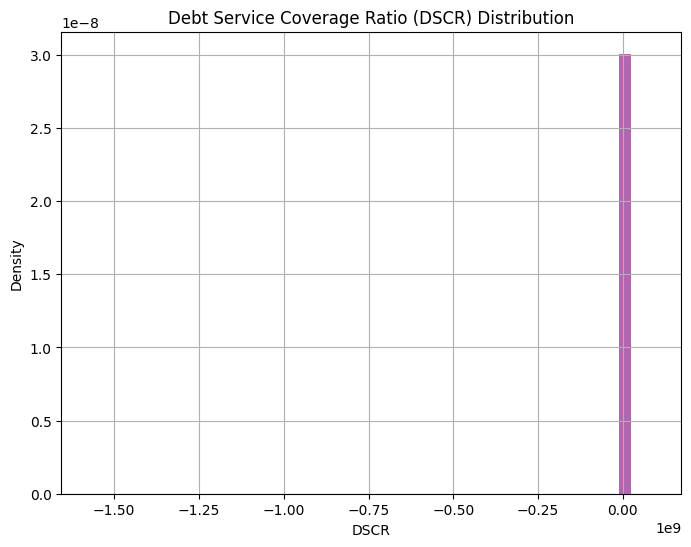

In [40]:
#set 0 to 1 for exp_financing
df['exp_financing'] = df['exp_financing'].replace(0, 1)

df['dscr'] = df['ebitda'] / df['exp_financing']

# Create a histogram to display the distribution of DSCR
plt.figure(figsize=(8, 6))
plt.hist(df['dscr'], bins=50, density=True, color='purple', alpha=0.6)
plt.title('Debt Service Coverage Ratio (DSCR) Distribution')
plt.xlabel('DSCR')
plt.ylabel('Density')
plt.grid(True)

# Display the plot
plt.show()


## Conditional Probability of Default for dscr

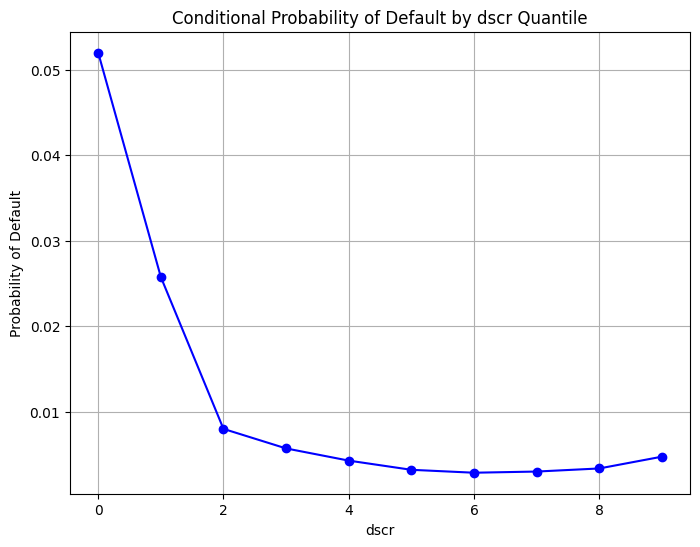

In [41]:
cash_assets_ratioquantiles = 10
df['dscr_quantile'] = pd.qcut(df['dscr'], q=quantiles, labels=False)  # 4 quantiles (quartiles)

# Step 3: Calculate the conditional probability of default for each quantile
quantile_default_rate = df.groupby('dscr_quantile')['default'].mean()
quantile_default_rate

plt.figure(figsize=(8, 6))

# Plot the line chart for default probability by cash_assets_ratio
plt.plot(quantile_default_rate.index, quantile_default_rate.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Conditional Probability of Default by dscr Quantile')
plt.xlabel('dscr')
plt.ylabel('Probability of Default')
plt.grid(True)

# Show the plot
plt.show()

## Modeling

In [43]:
df.shape

(1023552, 60)

In [45]:
df.head(2).T

,17,18
id,520288,520288
stmt_date,2011-12-31 00:00:00,2008-12-31 00:00:00
HQ_city,28.0,28.0
legal_struct,SRL,SRL
ateco_sector,14.0,14.0
def_date,NaT,NaT
fs_year,2011,2008
asst_intang_fixed,67537.0,256438.0
asst_tang_fixed,1137566.0,1181416.0
asst_fixed_fin,1908.0,860.0


In [46]:
calc_columns = ['default',
                'calculated_asst_tot',
                'liab_tot',
                'calculated_liabilities_equity',
                'asset_quantile',
                'financial_leverage',
                'financial_leverage_quantile',
                'profitability_ratio',
                'profitability_ratio_quantile',
                'net_receivables',
                'quick_ratio_v1',
                'quick_ratio_v2',
                'quick_ratio_v2_quantile',
                'cash_assets_ratio',
                'cash_assets_ratio_quantile',
                'dscr',
                'dscr_quantile']

In [52]:
df.sort_values('stmt_date', inplace=True)

In [60]:
modeling_df = df[calc_columns].copy()

In [63]:
train_df = modeling_df.iloc[:int(len(modeling_df)*0.8)]

In [66]:
test_df = modeling_df[~modeling_df.index.isin(train_df.index)]

In [68]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [74]:
feature_list = [
                'calculated_asst_tot',
                'liab_tot',
                'calculated_liabilities_equity',
                'asset_quantile',
                'financial_leverage',
                'financial_leverage_quantile',
                'profitability_ratio',
                'profitability_ratio_quantile',
                'net_receivables',
                'quick_ratio_v1',
                'quick_ratio_v2',
                'quick_ratio_v2_quantile',
                'cash_assets_ratio',
                'cash_assets_ratio_quantile',
                'dscr',
                'dscr_quantile']

In [78]:
formula = 'default ~ '+' + '.join(feature_list)
formula

'default ~ calculated_asst_tot + liab_tot + calculated_liabilities_equity + asset_quantile + financial_leverage + financial_leverage_quantile + profitability_ratio + profitability_ratio_quantile + net_receivables + quick_ratio_v1 + quick_ratio_v2 + quick_ratio_v2_quantile + cash_assets_ratio + cash_assets_ratio_quantile + dscr + dscr_quantile'

In [80]:
model = smf.logit(formula, data = train_df) 
logit_model_sm = model.fit()
print(logit_model_sm.summary())

Optimization terminated successfully.
         Current function value: 0.049458
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:               567050
Model:                          Logit   Df Residuals:                   567033
Method:                           MLE   Df Model:                           16
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                  0.2227
Time:                        20:12:13   Log-Likelihood:                -28045.
converged:                       True   LL-Null:                       -36082.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -5.0518      0.071    -71.560      0

In [85]:
predictions = test_df[['default']].copy()
predictions['predicted_probability'] = logit_model_sm.predict(test_df)
# predictions.dropna(inplace=True)
predictions.head()

,default,predicted_probability
2685479,0,0.000981
2275745,0,NaN
2249020,0,0.030974
2685422,0,0.016998
2658976,0,0.006691


In [87]:
predictions.isna().mean()

default                  0.000000
predicted_probability    0.283737
dtype: float64

In [82]:
from sklearn.metrics import roc_auc_score

In [83]:
roc_auc_score(y_score=predictions['predicted_probability'], y_true=predictions['default'])

np.float64(0.8683453237723993)

In [91]:
import seaborn as sns
sns.set()

<Axes: xlabel='predicted_probability', ylabel='Count'>

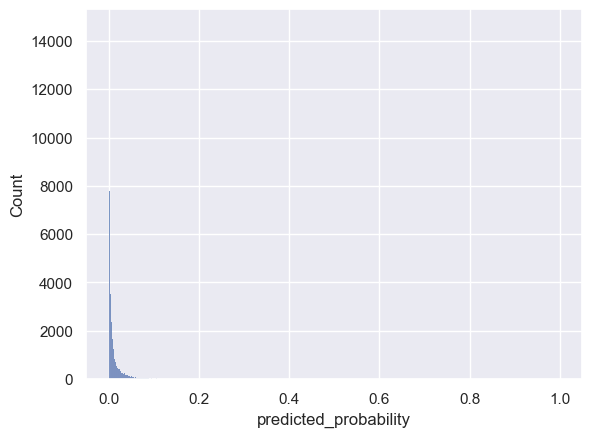

In [94]:
sns.histplot(predictions['predicted_probability'])

### company balance sheets

In [98]:
file_path = 'train.csv'  
new_df = pd.read_csv(file_path, index_col=0)
new_df.head()

,id,stmt_date,HQ_city,legal_struct,ateco_sector,def_date,fs_year,asst_intang_fixed,asst_tang_fixed,asst_fixed_fin,...,inc_extraord,taxes,profit,days_rec,ebitda,roa,roe,wc_net,margin_fin,cf_operations
17,520288,2011-12-31,28.0,SRL,14.0,NaT,2011,67537.0,1137566.0,1908.0,...,-309.0,-80959.0,-81288.0,NaN,6318.0,-3.81,-28.03,496258.0,-917029.0,-849.0
18,520288,2008-12-31,28.0,SRL,14.0,NaT,2008,256438.0,1181416.0,860.0,...,-678.0,-94622.0,-107382.0,NaN,46088.0,-2.76,NaN,97952.0,NaN,-3881.0
19,520288,2009-12-31,28.0,SRL,14.0,NaT,2009,194046.0,1152014.0,860.0,...,4224.0,-74235.0,-77819.0,NaN,67611.0,-2.17,NaN,-210671.0,NaN,32618.0
21,520288,2012-12-31,28.0,SRL,14.0,NaT,2012,15195.0,1116938.0,2023.0,...,3634.0,-250786.0,-250786.0,NaN,-161478.0,-12.99,NaN,367892.0,-1094962.0,-168907.0
22,520288,2007-12-31,28.0,SRL,14.0,NaT,2007,126603.0,1127807.0,620.0,...,820.0,92192.0,36733.0,NaN,153060.0,6.20,52.43,-317007.0,-1184970.0,80039.0


In [208]:
left_side_balance = [
    'asst_intang_fixed',
    'asst_tang_fixed',
    'asst_fixed_fin',
    'asst_current',
    'AR',
    'cash_and_equiv',
    'asst_tot',
    'goodwill'
]

In [183]:
right_side_balance = [
    'liab_lt',
    'liab_lt_emp', 
    'debt_bank_st',
    'debt_bank_lt',
    'debt_fin_st',
    'debt_fin_lt',
    'AP_st',
    'AP_lt',
    'debt_st',
    'debt_lt',
    'eqty_tot',
    'eqty_corp_family_tot',
]

In [168]:
good_example = new_df.loc[[786008]]

In [169]:
good_example['asst_tot'] 

786008    2320949.0
Name: asst_tot, dtype: float64

In [170]:
good_example[['asst_intang_fixed',
    'asst_tang_fixed',
    'asst_fixed_fin',
    # 'asst_current',
    'AR',
    'cash_and_equiv',]].sum(axis=1)

786008    2320949.0
dtype: float64

In [209]:
asset_cols = ['asst_intang_fixed',
    'asst_tang_fixed',
    'asst_fixed_fin',
    'AR',
    'cash_and_equiv',
             'goodwill']

# must be equal to 'asst_tot'

In [210]:
### left side total

ex_left_total = good_example[asset_cols].sum(axis=1)
ex_left_total

786008    2376869.0
dtype: float64

In [211]:
### right side

In [221]:
ex_right_total = good_example[['liab_lt',
    'liab_lt_emp', 
    'debt_bank_st',
    'debt_bank_lt',
    'debt_fin_st',
    'debt_fin_lt',
    'AP_st',
    'AP_lt',
    
    'eqty_tot',
    'eqty_corp_family_tot',
                               # 'debt_st',
    # 'debt_lt',
             ]].sum(axis=1)
ex_right_total

786008    2252557.0
dtype: float64

In [222]:
ex_left_total-ex_right_total

786008    124312.0
dtype: float64

In [223]:
good_example['debt_st']

786008    2056353.0
Name: debt_st, dtype: float64

In [224]:
good_example[['debt_bank_st','debt_fin_st','AP_st']].sum(axis=1)

786008    1997564.0
dtype: float64

In [228]:
2056353.0-1997564.0

58789.0

In [225]:
good_example[['debt_bank_lt','debt_fin_lt','AP_lt']].sum(axis=1)

786008    136961.0
dtype: float64

In [226]:
good_example['debt_lt']

786008    136961.0
Name: debt_lt, dtype: float64

In [184]:
good_example[right_side_balance]

,liab_lt,liab_lt_emp,debt_bank_st,debt_bank_lt,debt_fin_st,debt_fin_lt,AP_st,AP_lt,debt_st,debt_lt,eqty_tot,eqty_corp_family_tot
786008,0.0,0.0,1720233.0,136961.0,0.0,0.0,277331.0,0.0,2056353.0,136961.0,118032.0,NaN


In [186]:
good_example[left_side_balance]

,asst_intang_fixed,asst_tang_fixed,asst_fixed_fin,asst_current,AR,cash_and_equiv,asst_tot
786008,3849.0,92253.0,43170.0,2181677.0,2180436.0,1241.0,2320949.0


In [251]:
good_example[['debt_lt','debt_st','AP_lt','AP_st']].sum(axis=1)

786008    2470645.0
dtype: float64

In [252]:
good_example[['asst_tot']].sum(axis=1)

786008    2320949.0
dtype: float64

In [246]:
good_example[good_example.select_dtypes(['int','float']).columns[(good_example.select_dtypes(['int','float']) <= 58789.0).values[0]]].T

,786008
HQ_city,15.00
ateco_sector,68.00
fs_year,2009.00
asst_intang_fixed,3849.00
asst_fixed_fin,43170.00
cash_and_equiv,1241.00
liab_lt,0.00
liab_lt_emp,0.00
debt_fin_st,0.00
debt_fin_lt,0.00
